# EDA 

In [1]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

print('Done')

Done


In [2]:
#Read file .csv

df = pd.read_csv('/Users/humi.mochi/Downloads/data.csv')
df = df.drop_duplicates()
df.head()

,Title,Company,Location,Salary,Type,Category
0,Data Science Co-Op- Fall 2022,Agama Solutions,"Remote in San Francisco Bay Area, CA\n+3 locat...",NaN,NaN,data science
1,Data Science Co-Op- Fall 2022,Johnson & Johnson,"Cincinnati, OH 45242\n+38 locations",NaN,Full-time,data science
2,Data Science Co-Op- Fall 2022,Sony Music Entertainment US,"New York, NY",Estimated $149K - $189K a year,NaN,data science
3,Data Science Co-Op- Fall 2022,AstraZeneca,"Gaithersburg, MD 20878",NaN,Full-time,data science
4,Data Science Co-Op- Fall 2022,Disney Streaming,"San Francisco, CA\n+6 locations",NaN,Full-time,data science


In [3]:
#Check info df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 3910
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     3796 non-null   object
 1   Company   3794 non-null   object
 2   Location  3794 non-null   object
 3   Salary    1488 non-null   object
 4   Type      2538 non-null   object
 5   Category  3796 non-null   object
dtypes: object(6)
memory usage: 207.6+ KB


In [4]:
#Delete Null values in Salary col
df.dropna(subset=["Salary"], axis=0, inplace=True)

#Convert values in Category col to be capitalized
df['Category'] = df['Category'].str.capitalize()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 2 to 3907
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1488 non-null   object
 1   Company   1488 non-null   object
 2   Location  1488 non-null   object
 3   Salary    1488 non-null   object
 4   Type      926 non-null    object
 5   Category  1488 non-null   object
dtypes: object(6)
memory usage: 81.4+ KB


,Title,Company,Location,Salary,Type,Category
2,Data Science Co-Op- Fall 2022,Sony Music Entertainment US,"New York, NY",Estimated $149K - $189K a year,NaN,Data science
7,Data Science Co-Op- Fall 2022,American Institutes for Research,Remote\n+2 locations,Estimated $84.7K - $107K a year,Full-time,Data science
18,Assistant/Associate Project Scientist - Social...,Certilytics,Remote in United States,Estimated $93.3K - $118K a year,Full-time,Data science
22,Assistant/Associate Project Scientist - Social...,Instec Corp,Remote,Estimated $90.9K - $115K a year,NaN,Data science
23,Assistant/Associate Project Scientist - Social...,SunPower,Remote,Estimated $73.4K - $93K a year,NaN,Data science


In [5]:
#Find pattern Salary

def find_salary(a):
    if a:
        pattern = '\$[0-9]*[.,]?[0-9]*'
        p = re.compile(pattern)
        digits = p.findall(a)
        new1 = digits[0].replace("$", "")
        new2 = new1.replace(",", "")

        return float(new2)
    else:
        return 0

#Splitting Salary to calculate Average Salary

df[['min', 'max']] = df.Salary.str.split('-', expand=True)
df['Min Salary'] = df['min'].apply(find_salary).astype(float) * 1000
df['Max Salary'] = df['max'].apply(find_salary).astype(float) * 1000
df['AvgSalary'] = (df['Min Salary'] + df['Max Salary']) / 2
print(df[['min', 'Min Salary', 'max', 'Max Salary', 'AvgSalary']])

                    min  Min Salary            max  Max Salary  AvgSalary
2      Estimated $149K     149000.0   $189K a year    189000.0   169000.0
7     Estimated $84.7K      84700.0   $107K a year    107000.0    95850.0
18    Estimated $93.3K      93300.0   $118K a year    118000.0   105650.0
22    Estimated $90.9K      90900.0   $115K a year    115000.0   102950.0
23    Estimated $73.4K      73400.0    $93K a year     93000.0    83200.0
...                 ...         ...            ...         ...        ...
3901  Estimated $93.3K      93300.0   $118K a year    118000.0   105650.0
3903  Estimated $90.1K      90100.0   $114K a year    114000.0   102050.0
3905   Estimated $111K     111000.0   $141K a year    141000.0   126000.0
3906  Estimated $85.1K      85100.0   $108K a year    108000.0    96550.0
3907   Estimated $102K     102000.0   $129K a year    129000.0   115500.0

[1488 rows x 5 columns]


In [6]:
#Check unique values in columns

#df['Type'].unique()
#df['Category'].unique()
#df['Location'].unique()

In [7]:
# Fill all NaN values and replace values in Type col

df['Type'] = df['Type'].replace(to_replace="\W+", regex=True, value="").replace(to_replace="\d", regex=True, value="")
df['Type'].replace(np.nan,"Other",inplace=True)

df['Type'].value_counts()

Fulltime     831
Other        562
Contract      51
Parttime      40
Temporary      4
Name: Type, dtype: int64

In [8]:
#Replace values in Location col

df['Location'] = df['Location'].replace(to_replace="Remote in ", regex=True, value="").replace(to_replace="Hybrid remote in ", regex=True, value="")
df

,Title,Company,Location,Salary,Type,Category,min,max,Min Salary,Max Salary,AvgSalary
2,Data Science Co-Op- Fall 2022,Sony Music Entertainment US,"New York, NY",Estimated $149K - $189K a year,Other,Data science,Estimated $149K,$189K a year,149000.0,189000.0,169000.0
7,Data Science Co-Op- Fall 2022,American Institutes for Research,Remote\n+2 locations,Estimated $84.7K - $107K a year,Fulltime,Data science,Estimated $84.7K,$107K a year,84700.0,107000.0,95850.0
18,Assistant/Associate Project Scientist - Social...,Certilytics,United States,Estimated $93.3K - $118K a year,Fulltime,Data science,Estimated $93.3K,$118K a year,93300.0,118000.0,105650.0
22,Assistant/Associate Project Scientist - Social...,Instec Corp,Remote,Estimated $90.9K - $115K a year,Other,Data science,Estimated $90.9K,$115K a year,90900.0,115000.0,102950.0
23,Assistant/Associate Project Scientist - Social...,SunPower,Remote,Estimated $73.4K - $93K a year,Other,Data science,Estimated $73.4K,$93K a year,73400.0,93000.0,83200.0
...,...,...,...,...,...,...,...,...,...,...,...
3901,Requirements Engineer- Data Induction,Blue Cross of Idaho,"Meridian, ID 83642",Estimated $93.3K - $118K a year,Fulltime,Data engineer,Estimated $93.3K,$118K a year,93300.0,118000.0,105650.0
3903,Requirements Engineer- Data Induction,"Goken America, LLC","Ann Arbor, MI",Estimated $90.1K - $114K a year,Fulltime,Data engineer,Estimated $90.1K,$114K a year,90100.0,114000.0,102050.0
3905,Requirements Engineer- Data Induction,Wellframe,"Boston, MA 02210\n+1 location",Estimated $111K - $141K a year,Other,Data engineer,Estimated $111K,$141K a year,111000.0,141000.0,126000.0
3906,Requirements Engineer- Data Induction,Solidigm,"Folsom, CA\n+1 location",Estimated $85.1K - $108K a year,Fulltime,Data engineer,Estimated $85.1K,$108K a year,85100.0,108000.0,96550.0


In [9]:
#Find and replace values of Location col

df['Location'][df['Location'].str.contains('Remote')] = 'Unknow'
df['Location'][df['Location'].str.contains('United States')] = 'United States'

/var/folders/37/zptfwzd90b5cdb5pllq9xhmw0000gn/T/ipykernel_13290/725617312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'][df['Location'].str.contains('Remote')] = 'Unknow'
/var/folders/37/zptfwzd90b5cdb5pllq9xhmw0000gn/T/ipykernel_13290/725617312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'][df['Location'].str.contains('United States')] = 'United States'


In [10]:
#Split Location to City & State columns

df[['City', 'State']] = df.Location.str.split(',', expand=True)
df['State'] = df['State'].str[:3]
df.head()

,Title,Company,Location,Salary,Type,Category,min,max,Min Salary,Max Salary,AvgSalary,City,State
2,Data Science Co-Op- Fall 2022,Sony Music Entertainment US,"New York, NY",Estimated $149K - $189K a year,Other,Data science,Estimated $149K,$189K a year,149000.0,189000.0,169000.0,New York,NY
7,Data Science Co-Op- Fall 2022,American Institutes for Research,Unknow,Estimated $84.7K - $107K a year,Fulltime,Data science,Estimated $84.7K,$107K a year,84700.0,107000.0,95850.0,Unknow,None
18,Assistant/Associate Project Scientist - Social...,Certilytics,United States,Estimated $93.3K - $118K a year,Fulltime,Data science,Estimated $93.3K,$118K a year,93300.0,118000.0,105650.0,United States,None
22,Assistant/Associate Project Scientist - Social...,Instec Corp,Unknow,Estimated $90.9K - $115K a year,Other,Data science,Estimated $90.9K,$115K a year,90900.0,115000.0,102950.0,Unknow,None
23,Assistant/Associate Project Scientist - Social...,SunPower,Unknow,Estimated $73.4K - $93K a year,Other,Data science,Estimated $73.4K,$93K a year,73400.0,93000.0,83200.0,Unknow,None


In [11]:
# Fill all NaN values = UK in State col

df.fillna({'State':'UK'}, inplace=True)

#Combine City & State to Location2

df['Location2'] = df['City'].str.cat(df[['State']], sep=', ')

In [12]:
df['Type'].replace(to_replace=['Parttime','Temporary','Fulltime','Contract','Other'], value=[0,0,1,2,3],inplace=True)

In [13]:
#Drop columns unnecessary

df.drop(columns=['Location','Salary','min','max','Min Salary','Max Salary'], inplace=True)
df.head()

,Title,Company,Type,Category,AvgSalary,City,State,Location2
2,Data Science Co-Op- Fall 2022,Sony Music Entertainment US,3,Data science,169000.0,New York,NY,"New York, NY"
7,Data Science Co-Op- Fall 2022,American Institutes for Research,1,Data science,95850.0,Unknow,UK,"Unknow, UK"
18,Assistant/Associate Project Scientist - Social...,Certilytics,1,Data science,105650.0,United States,UK,"United States, UK"
22,Assistant/Associate Project Scientist - Social...,Instec Corp,3,Data science,102950.0,Unknow,UK,"Unknow, UK"
23,Assistant/Associate Project Scientist - Social...,SunPower,3,Data science,83200.0,Unknow,UK,"Unknow, UK"


### Visualization

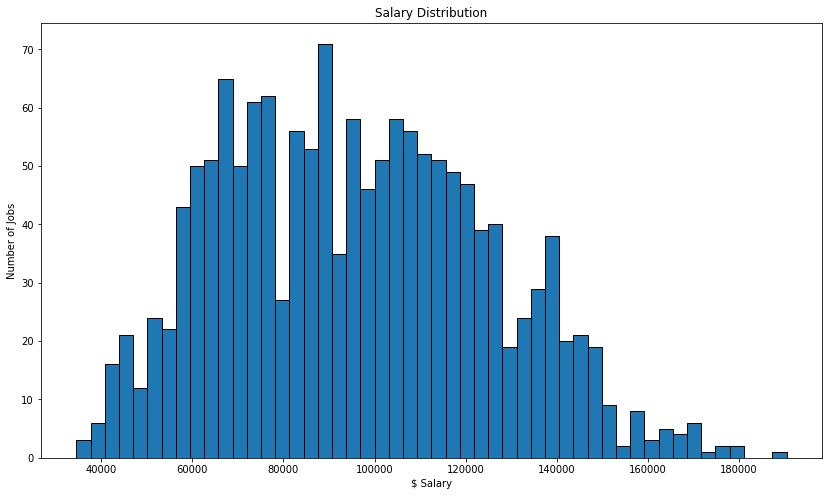

In [14]:
#Salary Distribution with Matplotlib Histograms 

plt.figure(figsize=(14,8))

x = list(df.AvgSalary)

plt.hist([x], bins = 50, color = None, label=None, ec="k")

plt.xlabel('$ Salary')
plt.ylabel('Number of Jobs')
plt.title('Salary Distribution')

plt.show()

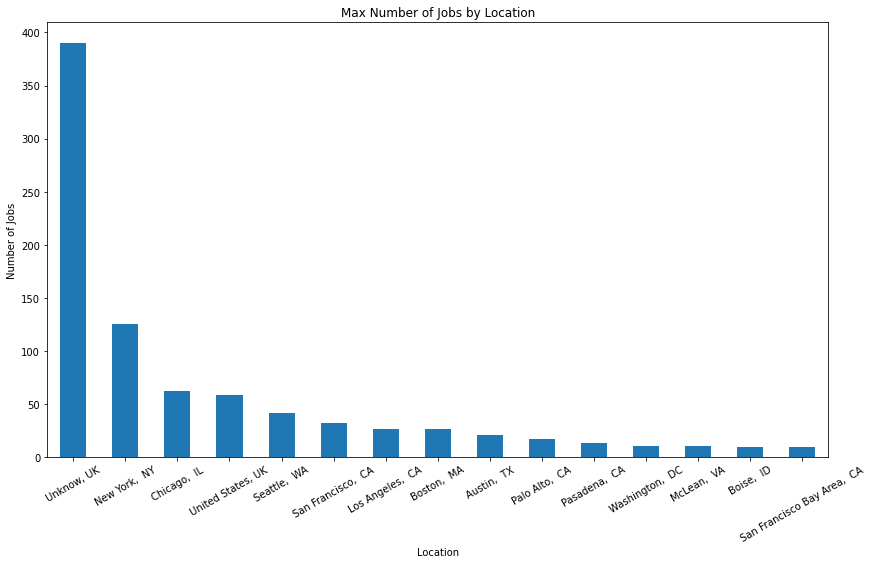

In [15]:
#Max Number of Jobs by Location with Matplotlib Bar Plot 

plt.figure(figsize=(14,8))

city_job = df.groupby('Location2')['Title'].count()
city_job.sort_values(ascending=False).nlargest(n=15).plot.bar()

plt.xticks(rotation=30)
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.title('Max Number of Jobs by Location')

plt.show()

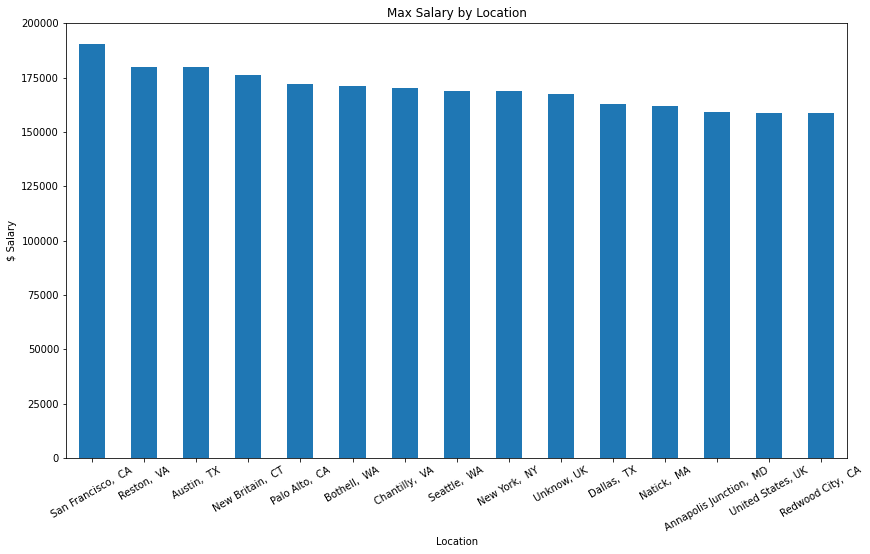

In [16]:
#Max Salary by Location with Matplotlib Bar Plot 

plt.figure(figsize=(14,8))
city_salary = df.groupby('Location2')['AvgSalary'].max()
city_salary.sort_values(ascending=False).nlargest(n=15).plot.bar()

plt.xticks(rotation=30)
plt.xlabel('Location')
plt.ylabel('$ Salary')
plt.title('Max Salary by Location')

plt.show()

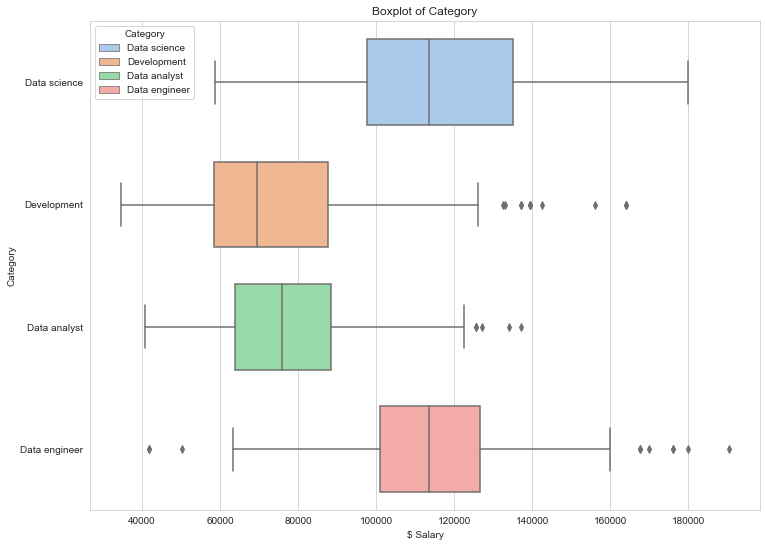

In [17]:
#Category Boxplot

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(x='AvgSalary', y='Category', hue="Category", data=df, palette="pastel", ax=ax, width=0.7, dodge=False)

plt.xlabel('$ Salary')
plt.ylabel('Category')
plt.title('Boxplot of Category')

plt.show()

In [18]:
# bins = np.linspace(min(df['AvgSalary']), max(df['AvgSalary']), 10)
# g = sns.FacetGrid(df, col="Category", hue="Category", palette="pastel", col_wrap=4)
# g.map(plt.hist, 'AvgSalary', bins=bins, ec="k")
# g.axes[-1].legend()
# plt.show()

### Pre-processing

In [19]:
# Categorize salary

def salary_category(salary):
    if 25000 <= salary < 50000:
        return 0
    if 50000 <= salary < 75000:
        return 1
    if 75000 <= salary < 100000:
        return 2
    if 100000 <= salary < 125000:
        return 3
    if 125000 <= salary < 150000:
        return 4
    if 150000 <= salary < 175000:
        return 5
    if 175000 <= salary < 200000:
        return 6

df['AvgSalary'] = df['AvgSalary'].apply(salary_category)

In [20]:
df['Type'].replace(to_replace=['Parttime','Temporary','Fulltime','Contract','Other'], value=[0,0,1,2,3],inplace=True)

In [21]:
df2 = pd.concat([df,pd.get_dummies(df["Category"])],axis=1)
df2.drop(columns=['Category','Location2'],axis=1,inplace=True)
df2.head()

,Title,Company,Type,AvgSalary,City,State,Data analyst,Data engineer,Data science,Development
2,Data Science Co-Op- Fall 2022,Sony Music Entertainment US,3,5,New York,NY,0,0,1,0
7,Data Science Co-Op- Fall 2022,American Institutes for Research,1,2,Unknow,UK,0,0,1,0
18,Assistant/Associate Project Scientist - Social...,Certilytics,1,3,United States,UK,0,0,1,0
22,Assistant/Associate Project Scientist - Social...,Instec Corp,3,3,Unknow,UK,0,0,1,0
23,Assistant/Associate Project Scientist - Social...,SunPower,3,2,Unknow,UK,0,0,1,0


In [22]:
df2.to_csv("data_final.csv")